### Importação dos dados



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja['loja'] = 'Loja 1'
loja2['loja'] = 'Loja 2'
loja3['loja'] = 'Loja 3'
loja4['loja'] = 'Loja 4'

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento


In [5]:
df_total = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
df_total.columns

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'loja'],
      dtype='object')

In [6]:
df_total['Faturamento'] = df_total['Preço'] + df_total['Frete']
faturamento_loja = df_total.groupby('loja')['Faturamento'].sum().reset_index()

In [7]:
print(faturamento_loja)

     loja   Faturamento
0  Loja 1  1.616347e+06
1  Loja 2  1.567773e+06
2  Loja 3  1.542048e+06
3  Loja 4  1.458253e+06


# 2. Vendas por Categoria


In [8]:
categoria_loja = df_total.groupby(['loja','Categoria do Produto']).size().reset_index(name='Quantidade de Vendas')
print(categoria_loja)

      loja   Categoria do Produto  Quantidade de Vendas
0   Loja 1             brinquedos                   324
1   Loja 1       eletrodomesticos                   312
2   Loja 1            eletronicos                   448
3   Loja 1        esporte e lazer                   284
4   Loja 1  instrumentos musicais                   182
5   Loja 1                 livros                   173
6   Loja 1                 moveis                   465
7   Loja 1  utilidades domesticas                   171
8   Loja 2             brinquedos                   313
9   Loja 2       eletrodomesticos                   305
10  Loja 2            eletronicos                   422
11  Loja 2        esporte e lazer                   275
12  Loja 2  instrumentos musicais                   224
13  Loja 2                 livros                   197
14  Loja 2                 moveis                   442
15  Loja 2  utilidades domesticas                   181
16  Loja 3             brinquedos               

In [ ]:
mais_popular = categoria_loja.sort_values('Quantidade de Vendas', ascending=False).groupby('loja').head(1)
print(mais_popular)

      loja Categoria do Produto  Quantidade de Vendas
22  Loja 3               moveis                   499
30  Loja 4               moveis                   480
6   Loja 1               moveis                   465
14  Loja 2               moveis                   442


# 3. Média de Avaliação das Lojas

In [9]:
media_avaliacoes = df_total.groupby('loja')['Avaliação da compra'].mean().reset_index()


In [ ]:
media_avaliacoes = media_avaliacoes.rename(columns={'Avaliação da Compra' : 'Média de Avaliações' })
print(media_avaliacoes)

     loja  Avaliação da compra
0  Loja 1             3.976685
1  Loja 2             4.037304
2  Loja 3             4.048326
3  Loja 4             3.995759


# 4. Produtos Mais e Menos Vendidos

In [10]:
vendas_produto = df_total.groupby(['loja', 'Produto']).size().reset_index(name='Quantidade de vendas')

In [13]:
mais_vendidos = vendas_produto.sort_values('Quantidade de vendas', ascending=False).groupby('loja').head(1)
menos_vendidos = vendas_produto.sort_values('Quantidade de vendas', ascending=True).groupby('loja').head(1)


In [16]:
destaques = pd.merge(
    mais_vendidos,
    menos_vendidos,
    on='loja',
    suffixes=(' Mais Vendido', ' Menos Vendido')
)
destaques

,loja,Produto Mais Vendido,Quantidade de vendas Mais Vendido,Produto Menos Vendido,Quantidade de vendas Menos Vendido
0,Loja 2,Iniciando em programação,65,Jogo de tabuleiro,32
1,Loja 4,Cama box,62,Guitarra,33
2,Loja 1,Guarda roupas,60,Celular ABXY,33
3,Loja 3,Kit banquetas,57,Blocos de montar,35


# 5. Frete Médio por Loja


In [18]:
custo_frete = df_total.groupby('loja')['Frete'].mean().reset_index()
custo_frete = custo_frete.rename(columns={'Frete':'Custo Frete - Médio'})
custo_frete['Custo Frete - Médio']=custo_frete['Custo Frete - Médio'].round(2)
print(custo_frete)

     loja  Custo Frete - Médio
0  Loja 1                34.69
1  Loja 2                33.62
2  Loja 3                33.07
3  Loja 4                31.28


## Gráfico de faturamento por loja

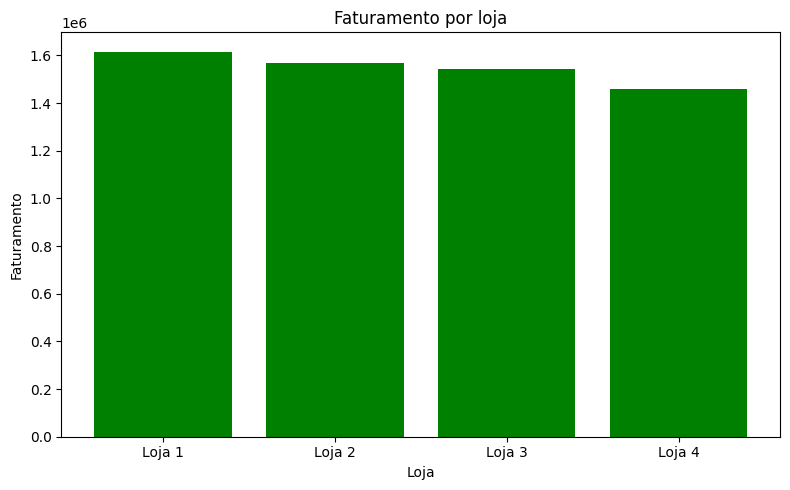

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(faturamento_loja['loja'], faturamento_loja['Faturamento'], color='green')
plt.title('Faturamento por loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento')
plt.tight_layout()
plt.show()

## Gráfico Avaliação média

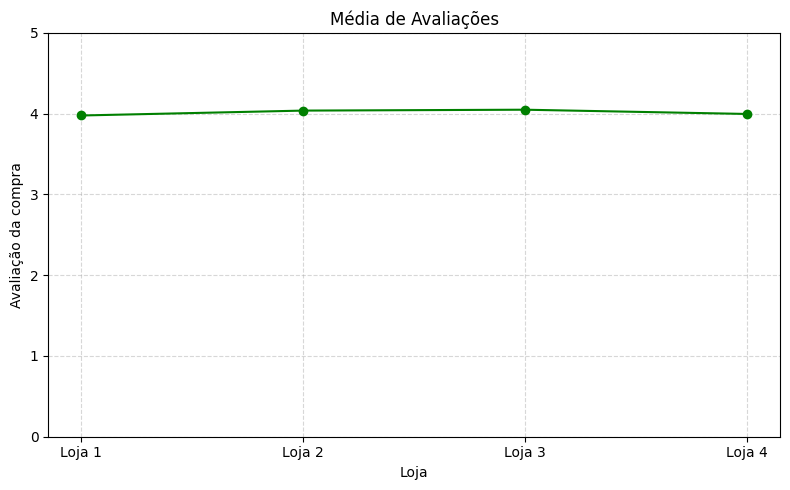

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(media_avaliacoes['loja'], media_avaliacoes['Avaliação da compra'], marker='o', color='green')
plt.title('Média de Avaliações')
plt.xlabel('Loja')
plt.ylabel('Avaliação da compra')
plt.ylim(0,5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Distribuição das categorias de produtos

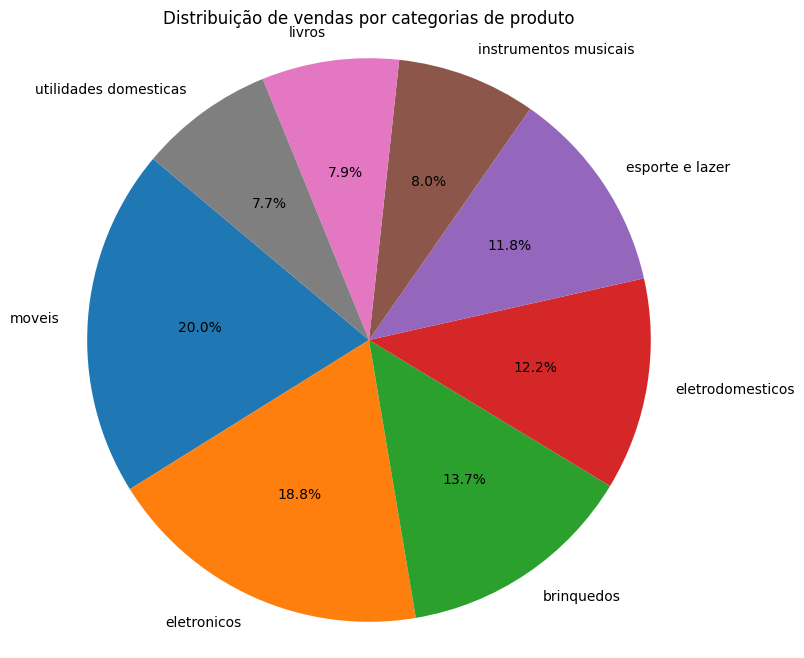

In [37]:
categorias = df_total['Categoria do Produto'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(categorias, labels=categorias.index, autopct = '%1.1f%%', startangle=140)
plt.title('Distribuição de vendas por categorias de produto')
plt.axis('equal')
plt.show()

## Produtos mais vendidos

In [49]:
import seaborn as sns
sns.set(style="whitegrid")

vendas_produto.columns
print(vendas_produto.columns.tolist())


['loja', 'Produto', 'Quantidade de vendas']


/tmp/ipython-input-2708031159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendas_produto, x='Quantidade de vendas', y='Produto',palette='magma')


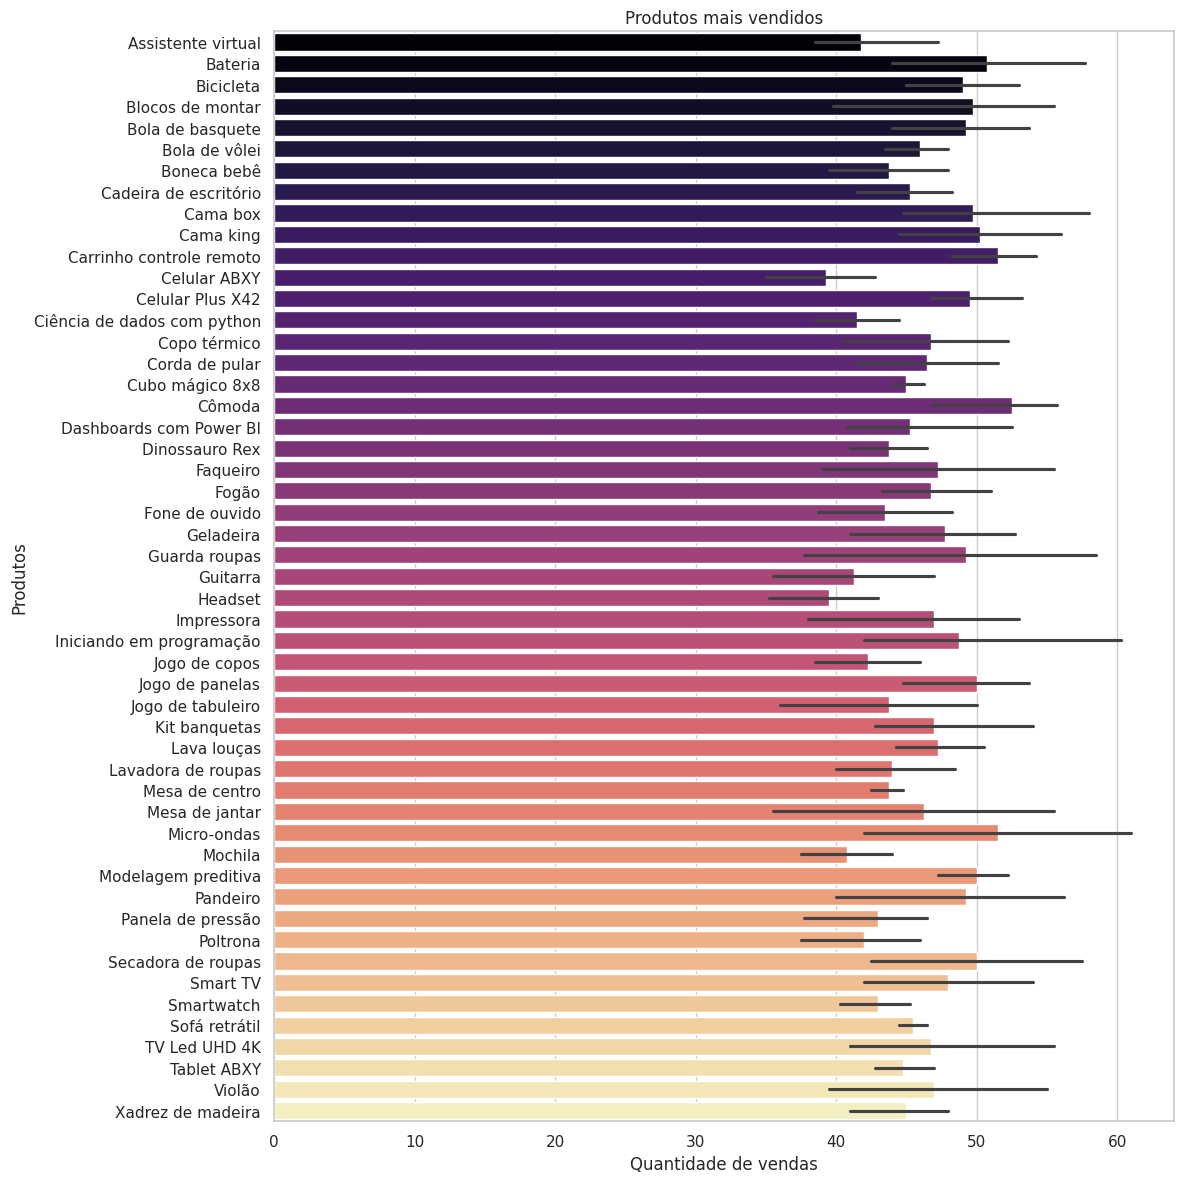

In [55]:
plt.figure(figsize=(12, 12))
sns.barplot(data=vendas_produto, x='Quantidade de vendas', y='Produto',palette='magma')
plt.title('Produtos mais vendidos')
plt.xlabel('Quantidade de vendas')
plt.ylabel('Produtos')
plt.tight_layout()
plt.show()

## Custo médio do frete

/tmp/ipython-input-3467337183.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=custo_frete, x='loja', y='Custo Frete - Médio', palette='Blues')


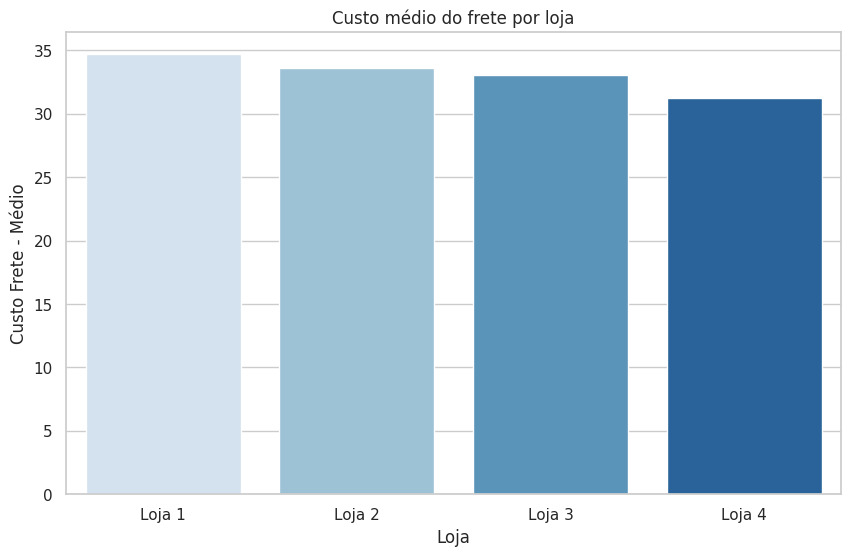

In [60]:
custo_frete.columns
plt.figure(figsize=(10,6))
sns.barplot(data=custo_frete, x='loja', y='Custo Frete - Médio', palette='Blues')
plt.title('Custo médio do frete por loja')
plt.ylabel('Custo Frete - Médio')
plt.xlabel('Loja')
plt.show()